# COGS 118A - Final Project

# A Model to Classify German Traffic Signs

## Group members

- Tianyu Yu
- Ziheng Chen 
- Zhou Sun
- Muhan He

# Abstract 
This project aims to create a model to recognize German traffic signs when given traffic signs pictures. 

We want to work on this traffic sign recognition topic because it is the foundation of self-driving cars. Companies like Tesla are working hard toward fully self-driving vehicles, and the foundation of the algorithm is to make cars read the information on roads. Traffic sign recognition is crucial in this area because it enables cars to understand current speed conditions, road situations, and traffic rules. We chose this dataset of German traffic signs since it is beautifully cleaned and widely used in the picture recognition topic.

The project data consists of images for both training and testing and class labels for each photo. Class labels are used for recognizing the traffic signs; they are descriptions of the traffic signs, such as "No entry" or "Turn left ahead." We will shuffle the training data first and then one-hot encoding the labels. After that, we will use the training data and encoded labels to train multiple machine learning models and pick the one with the highest accuracy. Next, we will measure the performance of the models using accuracy, which is calculated by the number of correct predictions / total number of data. Finally, we will improve the accuracy by trying different methods/models (such as TensorFlow). We expect to get at least 90 percent accuracy at the end of this project.

# Background

Traffic sign recognition has become a more popular topic in the past decade. With the enhancement of advanced technology, people have put eyes on automated vehicles. In order for the vehicles to be automated, the vehicle itself has to understand all the signs and the road traffic in real time. Thus the vehicle itself can act as a driver and does not require any input or interference by human. Therefore, for the safety of the passengers, traffic sign recognition is significantly important for autonomous driving.

Traffic signs recognition needs two parts: localization and recognition. Localization is for detecting and localizing where a traffic sign is in the image, and recognition is for identifying the sign. Also, because many images are low contrast and hard to distinguish, we can use “an algorithm called Contrast Limited Adaptive Histogram Equalization (CLAHE)” to increase the contrast. Thus, we can make images easier for computer to recognize<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote).

Research in the past has conducted on the traffic sign recognition and one difficulty that always arise is the lighting conditions in the outdoor environments<a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). This study considers the problem of lighting conditions and try to resolve it with a computer algorithm. The study recognizes that lighting conditions are changeable and not controllable, thus it is not possible to generate a complete model of all possibilities of the sign’s appearance<a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). The study proposed an algorithm that takes only the Hue and Saturation components in order to avoid lighting condition, this way, the recognition will be less affected by the lighting conditions<a name="admonish"></a>[<sup>[2]</sup>](#admonishnote).

Another paper utilizes the live speed of cars to help improve the recognition algorithm <a name="admonish"></a>[<sup>[3]</sup>](#admonishnote). By doing this, they can speed up the algorithm while remain the high accuracy.

# Problem Statement

Our goal is to use the data from our dataset to build a CNN to accurately classify traffic signals that can be found on German roads. Autonomous vehicle technology is rapidly improving, and having the ability to recognize a traffic sign, and being able to act upon is an indispensable part of such technology. The dataset will be divided into a training and test set. The training set will be used to train the CNN, and the testing set will be used to measure the accuracy of the CNN model. The success of the model will be measured through the accuracy with which it classifies the image of the traffic sign passed into the model. The overall goal is to reach 98% accuracy with the CNN. The data used will be German traffic signs only, as each country has different types of traffic signals. However, the same approach can be used to train a CNN to classify signs from different countries, as long as the dataset contains the traffic signs from that country specifically. 

# Data

Link tof the dataset: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign?select=Train.csv

The dataset we are using has: 
- 43 Classes, i.e. 43 different German Traffic Signs including, but are not limited to speed limits, warnings, yield etc. 
- More than 50,000 total images of traffic signals, procured from locations around Germany
- Each observation is one of the images in the dataset, which belongs to one of the 43 classes

An entry in the Train, Test and Meta CSVs contain: 
- the size of the image
- the Region of Interest (Roi)
- the class id (which traffic sign it is)
- the path to the image 

Critical Variables: 
- The RGB data extracted from each image
- Each pixel is represented by a vector of length three, with each value representing Red, Blue, Green
- The category/classID of traffic sign each image in the training set belongs to
- The predicted category/classID of the images in the testing set

In [1]:
# Import Visualization Tools
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

# Assigning Dataset File Paths
data_dir = 'Data/'
train_path = 'Data/Train/'
test_path = 'Data/Test/'

In [2]:
# read the 3 csv files
df_train = pd.read_csv('Data/Train.csv')
df_test = pd.read_csv('Data/Test.csv')
df_meta = pd.read_csv('Data/Meta.csv')

In [3]:
# check on the df_train
df_train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


Each observation in df_train contains 8 features. The width is the width of the image corresponding to the path of the image. The height is the height of the image. Roi.X1 is the upper left x coordinate of the sign on the image. Roi.Y1 is the upper left y coordinate of the sign of the image. Roi.X2 is the lower right x coordinate of the sign of the image. Roi.Y2 is the lower right y coordinate of the sign of the image. ClassId is the class of provided image and path is the path in the folder to the corresponding image.

In [4]:
# check on the df_test
df_test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


Similar to df_train, each observation also contains 8 features in df_test. The width is the width of the image corresponding to the path of the image. The height is the height of the image. Roi.X1 is the upper left x coordinate of the sign on the image. Roi.Y1 is the upper left y coordinate of the sign of the image. Roi.X2 is the lower right x coordinate of the sign of the image. Roi.Y2 is the lower right y coordinate of the sign of the image. ClassId is the class of provided image and path is the path in the folder to the corresponding image.

In [5]:
# check on the df_meta
df_meta.head()

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22


Each observation in df_meta contains 5 features. The path is the path of the corresponding image. The ClassId is the class of provided image. The ShapeId is the shape of sign, 0 for triangle, 1 for circle, 2 for diamond, 3 for hexagon, 4 for inverse triangle. The ColorId is the color of the sign, 0 for red, 1 for blue, 2 for yellow, 3 for white. The SignId is the SignID by the German Traffic Rule.

In [6]:
# 2 df have the same shape
print(df_train.shape, df_train.shape)

(39209, 8) (39209, 8)


They look like the same thing with different selections from one bigger data.

In [7]:
type(df_train['ClassId'][0]), type(df_test['ClassId'][0])

(numpy.int64, numpy.int64)

As we seen in both df_test and df_train, the classIds are types of numpy.ind64. However, they are supposed to represent a class of image not a numerical value of image. Thus we need to change the ClassIds to strings

In [8]:
# check type
df_train['ClassId'] = df_train['ClassId'].astype(str)
df_test['ClassId'] = df_test['ClassId'].astype(str)
type(df_train['ClassId'][0]), type(df_test['ClassId'][0])

(str, str)

In [9]:
# check unique values
df_train['ClassId'].unique()

array(['20', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42'], dtype=object)

In [10]:
# check unique values
df_test['ClassId'].unique()

array(['16', '1', '38', '33', '11', '18', '12', '25', '35', '7', '23',
       '4', '9', '21', '20', '27', '3', '13', '10', '5', '17', '34', '2',
       '8', '30', '24', '15', '26', '28', '22', '14', '32', '29', '6',
       '36', '40', '41', '31', '19', '0', '39', '42', '37'], dtype=object)

Now all of the values in 'ClassId' are in strings, but we want to organize the number so that every values are made of 2 digits

In [11]:
# the classID so that both df_train and df_test have 2 digits in ClassIds
for i in range(0, len(df_train['ClassId'])):
  if len(df_train['ClassId'][i]) == 1:
       df_train['ClassId'][i] = '0' + df_train['ClassId'][i]
for i in range(0, len(df_test['ClassId'])):
   if len(df_test['ClassId'][i]) == 1:
      df_test['ClassId'][i] = '0' + df_test['ClassId'][i]
        
df_train['ClassId'].unique()

C:\Users\yty20\AppData\Local\Temp\ipykernel_36304\887560608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['ClassId'][i] = '0' + df_train['ClassId'][i]
C:\Users\yty20\AppData\Local\Temp\ipykernel_36304\887560608.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['ClassId'][i] = '0' + df_test['ClassId'][i]


array(['20', '00', '01', '02', '03', '04', '05', '06', '07', '08', '09',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42'],
      dtype=object)

In [12]:
df_test['ClassId'].unique()

array(['16', '01', '38', '33', '11', '18', '12', '25', '35', '07', '23',
       '04', '09', '21', '20', '27', '03', '13', '10', '05', '17', '34',
       '02', '08', '30', '24', '15', '26', '28', '22', '14', '32', '29',
       '06', '36', '40', '41', '31', '19', '00', '39', '42', '37'],
      dtype=object)

In [13]:
# columns' info
df_train.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2
count,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000
mean,50.835880,50.328930,5.999515,5.962381,45.197302,44.728379
std,24.306933,23.115423,1.475493,1.385440,23.060157,21.971145
min,25.000000,25.000000,0.000000,5.000000,20.000000,20.000000
25%,35.000000,35.000000,5.000000,5.000000,29.000000,30.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000
75%,58.000000,58.000000,6.000000,6.000000,53.000000,52.000000
max,243.000000,225.000000,20.000000,20.000000,223.000000,205.000000


This shows that there are 39209 observations in the df_train dataset. The average width of the images in df_train are around 50.8. The average height of the images in df_train is around 50.3. Demonstrating that the images in df_train are spare shape images. The average upper left x coordinate of the sign of the image is 5.99 and the average upper left y coordinate of the sign of the iamge is 5.96. The average lower right x coordinate of the sign of the image is 45.20 and the average lower right y coordinate of the sign of the image is 44.73.

In [14]:
# columns' info
df_test.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2
count,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000
mean,50.507759,50.364450,5.998021,5.982423,44.864450,44.758116
std,25.088483,23.698908,1.543954,1.427424,23.776102,22.494697
min,25.000000,25.000000,1.000000,5.000000,20.000000,20.000000
25%,34.000000,35.000000,5.000000,5.000000,29.000000,29.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000
75%,58.000000,57.000000,6.000000,6.000000,53.000000,52.000000
max,266.000000,232.000000,23.000000,19.000000,244.000000,212.000000


This shows that there are 39209 observations in the df_test dataset. The average width of the images in df_train are around 50.5. The average height of the images in df_train is around 50.4. Demonstrating that the images in df_test are aslo square shape. The average upper left x coordinate of the sign of the image is 5.99 and the average upper left y coordinate of the sign of the iamge is 5.98. The average lower right x coordinate of the sign of the image is 44.86 and the average lower right y coordinate of the sign of the image is 44.76. Both the upper left xy coordinate and the lower right xy coordinate shows similar average values, this could implies that the signs are at about the same position in each image in both df_test and df_train.

In [15]:
# There is no nan value for both df
print(df_train.isnull().values.any(), df_test.isnull().values.any())

False False


Since there are no null values in both df_train and df_test. We don't need to remove any observations that are not applicable. Thus we can move on to visualizations.

In [16]:
# Finding Total Number of Classes/Types of Signs
NUM_CLASSES = len(os.listdir(train_path))
NUM_CLASSES

43

In [17]:
# Create Human Readable Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

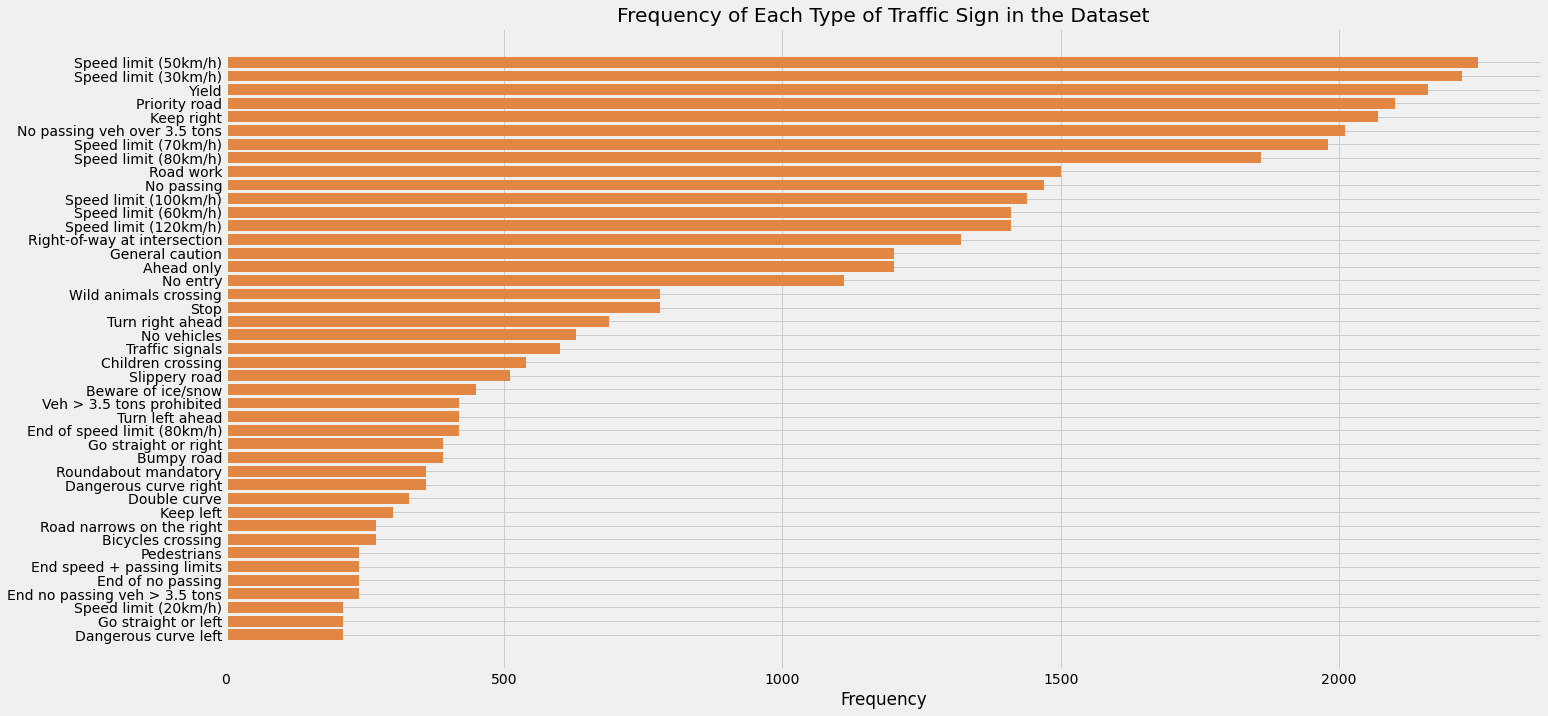

In [18]:
# Prep data for visualization
folders = os.listdir(train_path)

train_num = []
class_num = []

for folder in folders:
    # Append the number of each class of images to an array
    train_num.append(len(os.listdir(train_path + '/' + folder)))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset by number of images per class
sorted_pairs = sorted(zip(train_num, class_num))
tuples = zip(*sorted_pairs)
train_num, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the frquency of each class of images
plt.figure(figsize=(21,11))
plt.xlabel("Frequency")  
plt.title("Frequency of Each Type of Traffic Sign in the Dataset")
# plt.bar(class_num, train_num, color='#e28743')
plt.barh(class_num, train_num, color='#e28743');
# plt.xticks(class_num, rotation=90)

As we can see, speed limit sign occurs more often than dangerous curve signs.

Before jumping into model training section. We want to visualize example of image of a traffic sign in our training dataset and testing set.

20 Train/20/00020_00000_00001.png


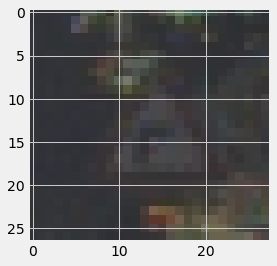

In [19]:
# training picture example
print(df_train['ClassId'][1], df_train['Path'][1])
img = Image.open('Data/' + df_train['Path'][1])
plt.imshow(img)

01 Test/00001.png


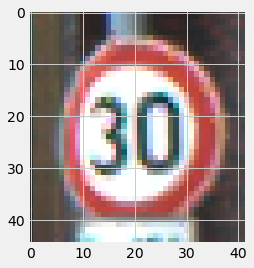

In [20]:
# testing picture example
print(df_test['ClassId'][1], df_test['Path'][1])
img = Image.open('Data/' + df_test['Path'][1])
plt.imshow(img)

# Proposed Solution

Our proposed solution is to use a CNN to classify the images in the dataset. The images themselves would need to be converted to a format such that the image data can be fit into numpy arrays. Additionally, the labels of the dataset would need to be one-hot encoded so that calculations and predictions can be made. The model itself would be made using libraries such as tensorflow or keras, and the image data would need to be shuffled for the models to be trained properly. A portion of the dataset would be used as training data while the other will be used as testing/validation data. The solution will be tested by comparing the predicted ID of an image with the image’s actual class ID to calculate the accuracy of the model. The benchmark model against which our solution will be tested is a model by Shivank Sharma with a 98% accuracy: https://www.kaggle.com/code/shivank856/gtsrb-cnn-98-test-accuracy

# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).


One of the evaluation metrics we would use to evaluate performance of our model is to figure out the accuracy of prediction for the trained model. Firstly, we could calculate accuracy by comparing predicted results to our test templet, and then compare the accuracy with the benchmark model’s accuracy(98%). The average accuracy of our predicted model should be close to or more than 98%, which should be close or even better to the benchmark model's accuracy. 

We calculate Accuracy by dividing the number of accurately predicted records by the total number of records. In our project, we use model.fit() to gain the metrics that we need to calculate accuracy, because it generates output predictions for the input samples and display the accuracies for our predicted data and tested data.

We can also use recall and precision metrics to measure the model's performance. Details will be elaborated in the conclusion.

# Results

In [21]:
# Import Modeling Tools
import cv2
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
np.random.seed(42)

#### Collect the Training Data from Train.csv

In [22]:
# Resizing the images to 30x30x3
IMG_HEIGHT = 20
IMG_WIDTH = 20
channels = 3

In [23]:
# gather images and the corresponding labels
image_data = []
image_labels = []

for i in range(NUM_CLASSES):
    images = os.listdir(data_dir + '/Train/' + str(i))

    for img in images:
        image = cv2.imread(data_dir + '/Train/' + str(i) + '/' + img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        image_data.append(np.array(resize_image))
        image_labels.append(i)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 20, 20, 3) (39209,)


In [24]:
# Those numbers are RGB numbers for pixels (the first 5 pixels in the first image)
image_data[0][:5,0]

array([[ 81,  79,  76],
       [ 83,  81,  81],
       [ 75,  76,  77],
       [ 69,  79,  81],
       [123, 117, 118]], dtype=uint8)

In [25]:
# The label code for each image data
image_labels

array([ 0,  0,  0, ..., 42, 42, 42])

#### Shuffle the Data and split it into traning set and test set

In [26]:
shuffle_idx = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_idx)
# check the shuffled indexes
print(shuffle_idx)
image_data = image_data[shuffle_idx]
image_labels = image_labels[shuffle_idx]

[30003 23050 21060 ... 38158   860 15795]


In [27]:
# Split with 0.3 and 0.7
X_train, X_test, y_train, y_test = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)
# get the proportion of each channels in colors (how red, how green, how blue)
# Normalize the values
X_train = X_train/255 
X_test = X_test/255
print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)

X_train.shape (27446, 20, 20, 3)
X_test.shape (11763, 20, 20, 3)
y_train.shape (27446,)
y_test.shape (11763,)


Notice that the shape doesn't change. We only change the values into proportions.

#### One-Hot Encode the Labels

In [28]:
# tf.keras.utils.to_categorical: Converts a class vector (integers) to binary class matrix.
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

print(y_train.shape)
print(y_test.shape)

(27446, 43)
(11763, 43)


In [29]:
# check the binary one hot encoding matrix
print(y_train, y_test)
# check whether the values has only 0 or 1
print(np.unique(y_train), np.unique(y_test))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 1.] [0. 1.]


### Subsection 1: Create the baseline Sequantial Keras CNN with all default Hyperparameters

In [30]:
# define layers
layer_1 = keras.layers.Conv2D(filters=16, kernel_size=(3,3), input_shape=(IMG_HEIGHT,IMG_WIDTH,channels))
layer_2 = keras.layers.Conv2D(filters=16, kernel_size=(3,3))
layer_3 = keras.layers.Conv2D(filters=16, kernel_size=(3,3))
layer_4 = keras.layers.Conv2D(filters=16, kernel_size=(3,3))
# define max pool
max_pool = keras.layers.MaxPool2D(pool_size=(2, 2))
# create a model
model = keras.models.Sequential()

# adding the layers that we have defined earlier
model.add(layer_1)
model.add(layer_2)
model.add(max_pool)
model.add(keras.layers.BatchNormalization(axis=-1))

model.add(layer_3)
model.add(layer_4)
model.add(max_pool)
model.add(keras.layers.BatchNormalization(axis=-1))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(43))

We build the model by defining the 4 2D convolution layer that are used for image receognition. These four layers that we are going to add each layer into the sequantial model and each of them contains 16 filters and the kernel size are all set to (3,3).


Now a model is "built", so we can call its summary() method to display the contents

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 18, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 16)         64        
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 16)          2320      
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          2

For the conv2d_3 layer, number of params is 2320. Similarly, for the dense_1 layer, the number of params is 22059. Same things can be concluded for other layers.

before fitting the model to our data, we will need to compile the layers with our model and add the corresponding optimizer

In [32]:
# define number of interations for the training and the learning rate for the optimizer
learning_rate = 0.001
epochs = 30
opt = Adam(learning_rate=learning_rate, decay=learning_rate / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [33]:
# using the default parameters for the Image data generator from tensorflow
augmentation = ImageDataGenerator()


# fitting the model with our data
fit = model.fit(augmentation.flow(X_train, y_train), epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/30
858/858 [==============================] - 9s 9ms/step - loss: 8.3738 - accuracy: 0.0543 - val_loss: 7.6130 - val_accuracy: 0.0644
Epoch 2/30
858/858 [==============================] - 8s 9ms/step - loss: 8.2875 - accuracy: 0.0467 - val_loss: 8.7425 - val_accuracy: 0.0451
Epoch 3/30
858/858 [==============================] - 8s 9ms/step - loss: 8.3875 - accuracy: 0.0485 - val_loss: 7.0178 - val_accuracy: 0.0612
Epoch 4/30
858/858 [==============================] - 8s 9ms/step - loss: 8.1692 - accuracy: 0.0528 - val_loss: 7.6168 - val_accuracy: 0.0480
Epoch 5/30
858/858 [==============================] - 8s 9ms/step - loss: 8.2200 - accuracy: 0.0423 - val_loss: 9.2634 - val_accuracy: 0.0282
Epoch 6/30
858/858 [==============================] - 8s 9ms/step - loss: 8.1775 - accuracy: 0.0341 - val_loss: 7.9324 - val_accuracy: 0.0467
Epoch 7/30
858/858 [==============================] - 8s 9ms/step - loss: 8.1531 - accuracy: 0.0469 - val_loss: 7.3289 - val_accuracy: 0.0518
Epoch 

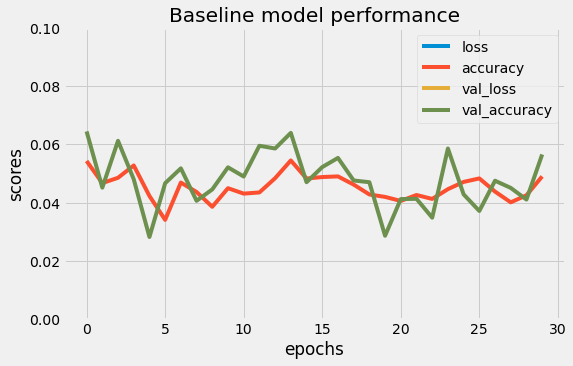

In [34]:
# plotting the epochs vs the score of loss, accuracy, validation loss, and validation accuracy for every epoch
pd.DataFrame(fit.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.1)
plt.title('Baseline model performance')
plt.xlabel('epochs')
plt.ylabel('scores')
plt.show()

As the graph shows, our accuracy is around 0.05 and they are not getting any better for more epochs.

This tells us that we need to modify our hyper parameter of the model to better fit the data.

To further understand the accuracy of our model, we will use the test data to predict with our models and examine the accuracy score

In [35]:
# retrieve the original test.csv
df_test = pd.read_csv(data_dir + '/Test.csv')

# take the values of the path of each test image
path_of_images = df_test["Path"].values

# append each resized image sizes into the new list called data
data =[]
for img in path_of_images:
    try:
        im = cv2.imread(data_dir + '/' + img)
        image_from_array = Image.fromarray(im, 'RGB')
        resized_image = image_from_array.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resized_image))
    except:
        print("Error in " + img)
        
# divide the new X_test data by the color range of 255
X_test_new = np.array(data)
X_test_new = X_test_new/255

# create the predictions and take the max accuracy predictions
predict_x = model.predict(X_test_new) 
pred = np.argmax(predict_x , axis=1)
classid = df_test["ClassId"].values

#Accuracy with the test data
print('Test Data accuracy: ', accuracy_score(classid, pred))

395/395 [==============================] - 1s 2ms/step
Test Data accuracy:  0.0613618368962787


In [36]:
# create the precision score from our prediction accuracy
precisionScore = precision_score(classid, pred, average='macro')

C:\Users\yty20\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
recallScore = recall_score(classid, pred, average='macro')

In [38]:
f1Score = 2 * (precisionScore * recallScore) / (precisionScore + recallScore)
f1Score

0.029074556955645713

The f1 score for our baseline model is 0.029074556955645713, and this aligns with the graphic result of of baseline model predictions which is not so accurate. Therefore we need to modify our hyper parameter for our model.

### Subsection 2: Final model with appropriate hyperparameters

As can be seen in subsection 1, the performance of the CNN with default hyperparameters is horrible, and definitely not usable as it is. With an accuracy and F1 score lower than 10%, it is not feasible to use it in the real world at all. Therefore, the hyperparameters have to be tuned so that the model is not only usable, but also quite good at traffic sign classification. The key hyperparameters of this CNN are the filter size, number of CNN layers, and the kernel size through which each image is passed through. It is quite typical to start with a lower number of filters and a larger kernel size in the first layer, and then increase the number of filters while decreasing kernel size to achieve a more accurate prediction. 

In [39]:
# hyperparameters were referenced from https://www.kaggle.com/code/lalithmovva/99-accuracy-on-german-traffic-sign-recognition
# define layers
# increase the number of filters and decrease the kernel size per layer
final_layer_1 = keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels))
final_layer_2 = keras.layers.Conv2D(filters=32, kernel_size=(5,5))
final_layer_3 = keras.layers.Conv2D(filters=64, kernel_size=(3,3))
final_layer_4 = keras.layers.Conv2D(filters=64, kernel_size=(3,3))

# define max pool
final_max_pool = keras.layers.MaxPool2D(pool_size=(2, 2))

# create a sequential model
final_model = keras.models.Sequential()
# add the first two layers of the CNN
final_model.add(final_layer_1)
final_model.add(final_layer_2)
final_model.add(final_max_pool)
final_model.add(keras.layers.BatchNormalization(axis=-1))

# add the last two layers of the CNN
final_model.add(final_layer_3)
final_model.add(final_layer_4)
final_model.add(final_max_pool)
final_model.add(keras.layers.BatchNormalization(axis=-1))

# flatten the input to make the data easier to process
final_model.add(keras.layers.Flatten())
final_model.add(keras.layers.Dense(256, activation='relu'))
final_model.add(keras.layers.BatchNormalization())
final_model.add(keras.layers.Dropout(rate=0.5))
final_model.add(keras.layers.Dense(43, activation='softmax'))

final_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [40]:
# Set the number of epochs to run the model for
epochs = 30

# augment the images to make it easier to make predictions
aug = ImageDataGenerator()
# fit the model 
final_history = final_model.fit(aug.flow(X_train, y_train), epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/30
858/858 [==============================] - 11s 12ms/step - loss: 0.8761 - accuracy: 0.7698 - val_loss: 0.1946 - val_accuracy: 0.9449
Epoch 2/30
858/858 [==============================] - 11s 13ms/step - loss: 0.1800 - accuracy: 0.9489 - val_loss: 0.0940 - val_accuracy: 0.9742
Epoch 3/30
858/858 [==============================] - 10s 12ms/step - loss: 0.1212 - accuracy: 0.9643 - val_loss: 0.0632 - val_accuracy: 0.9805
Epoch 4/30
858/858 [==============================] - 10s 12ms/step - loss: 0.0899 - accuracy: 0.9737 - val_loss: 0.0487 - val_accuracy: 0.9864
Epoch 5/30
858/858 [==============================] - 10s 12ms/step - loss: 0.0818 - accuracy: 0.9746 - val_loss: 0.0731 - val_accuracy: 0.9799
Epoch 6/30
858/858 [==============================] - 10s 11ms/step - loss: 0.0629 - accuracy: 0.9813 - val_loss: 0.0437 - val_accuracy: 0.9874
Epoch 7/30
858/858 [==============================] - 10s 12ms/step - loss: 0.0628 - accuracy: 0.9800 - val_loss: 0.0359 - val_accuracy:

As can be seen from the above results, the loss and validation loss are very close to 0, while the accuracy and validation accuracy of the mode go as high as 99%! This shows the importance of choosing the right hyperparameters to fit a CNN model. To visualize the performance, the results from each epoch above will be graphed: 

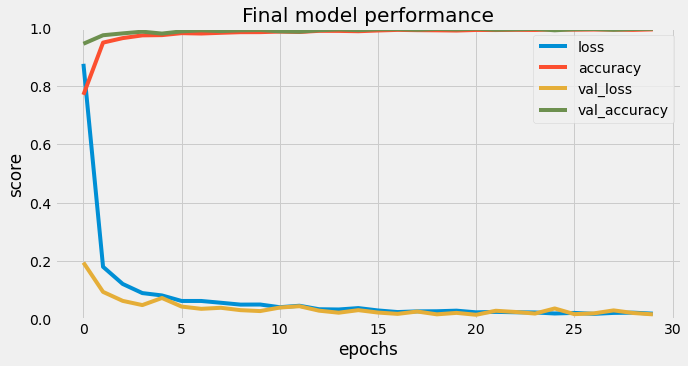

In [41]:
# plot the performance of the model over each epoch
pd.DataFrame(final_history.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('Final model performance')
plt.xlabel('epochs')
plt.ylabel('score')
plt.show()

As can be seen, the accuracy and validation accuracy of the model reach their peak values at around 10 epochs, while loss and validation loss reach an asymptotic limit at around 10 epochs as well. 
The final model is performing well because as the epochs increase, the accuracy gets higher and the loss gets lower, meaning that each epoch is training the CNN to be more accurate in its predictions. The last step is to evaluate the performance of the model with a testing set. 

In [44]:
# Evaluate final model performance 
final_test = pd.read_csv(data_dir + '/Test.csv')

final_labels = final_test["ClassId"].values
final_imgs = final_test["Path"].values

final_data =[]
# create the data array that will be passed into the model for the prediction test
for img in final_imgs:
    final_image = cv2.imread(data_dir + '/' +img)
    final_image_from_array = Image.fromarray(final_image, 'RGB')
    resize_image = final_image_from_array.resize((IMG_HEIGHT, IMG_WIDTH))
    final_data.append(np.array(resize_image))

X_test = np.array(final_data)
X_test = X_test/255


final_predict_x = final_model.predict(X_test) 
final_pred = np.argmax(final_predict_x,axis=1)
print('Test Data accuracy: ', accuracy_score(final_labels, final_pred))

395/395 [==============================] - 1s 2ms/step
Test Data accuracy:  0.9638163103721299


The accuracy of the finalized model with the tuned hyperparameters was able to reach an accuracy of 96.38% with the testing data, much better than the baseline model's abysmal 6.14%. This means that the final model can quite reliably classify each type of traffic sign. However, accuracy is not everything when measuring the performance of a model. The precision, recall and F1 score are also important. 

### Subsection 3: Add recall, precision, and F1 score metrics

In [45]:
# calculate the performance metrics for the final model
final_precision = precision_score(final_labels, final_pred, average='macro')
final_recall = recall_score(final_labels, final_pred, average='macro')
final_f1 = 2 * (final_precision * final_recall) / (final_precision + final_recall)


print('Test Data precision: ', final_precision)
print('Test Data recall: ', final_recall)
print('Test Data F1: ', final_f1)

Test Data precision:  0.949642219088427
Test Data recall:  0.9375585413537891
Test Data F1:  0.9435616945468928


As can be seen from the results, the model has 94.96% precision in predicting which traffic sign is being passed into the CNN, meaning that it is quite good at predicting true positives. On the other hand, the recall is only a little lower at 93.75%, meaning that the model is also quite good at minimizing the number of false negatives. The F1 score is also a respectabe 94.36%, suggesting that the model is overall quite effective at classifying German traffic signs. 

# Discussion

### Interpreting the result

Main point: The model can predict German traffic signs very well.

The accuracy is 0.9638163103721299, which is very high. Since accuracy is defined as the proportion of predictions that are correct. We know that xx of traffic signs predictions are correct. Imagine a smart car use this model to identify traffic signs, you will constantly see correct predictions while driving!

Subpoint 1: 
The recall is the proportion of actually positive instances that are correctly classified. We know that 0.9375585413537891 of actually positive instances that are correctly classified. We want a high recall score because false negatives are really bad in traffic signs recognition: they mean that a sign goes undetected.

Subpoint 2:
The precision is the proportion of predicted positive instances that are correctly classified. We know that 0.949642219088427 of predicted positive instances that are correctly classified. We want a high precision score because false positives are really bad in traffic signs recognition: they mean that a sign is identified to other signs! This could be dangerous since we don’t want to identify speed limit 25m/h to 65m/h!

Subpoint 3:
Since both recall and precision are important, we can use F1-score. F1-score cares equally about a model's precision and recall. Our final F1-score is 0.9435616945468928, which is very decent since it is above 0.9!

### Limitations

Since in class we didn’t learn how to set appropriate hyperparameters for GridSearchCV and apply it to the sequential model, we trained a base model with default parameters. To make some progress and explore more, we referred to hyperparameters in a Kaggle’s project <a name="admonish"></a>[<sup>[4]</sup>](#admonishnote) and made some changes to tune the hyperparameters for GridSearchCV for the sequential model. Besides, all the photos are traffic signs in German, so our dataset is limited to this country and our model cannot be used to predict traffic signs in all other countries.

### Ethics & Privacy

Lack of transparency of AI tools/ lack of trust: Since the process of AI decision-making is not visible to humans, so AI’s intelligence so far is not very reliable compared to humans’ intelligence to make some crucial decisions. Although it’s a concern if our model is used as part of functions in autonomous vehicles, our model can also be used as an assistance for drivers to help them make better decisions on the road. Thus, our project could avoid potential risks in the usage of AI tools.

AI is not neutral: Since AI decision-making is largely dependent on the datasets we trained and used, there could be some bias like too much data for majorities and too little data for minorities in a category. Although our dataset involves more than 40 classes of traffic signs and more than 50000 observations, there’s no bias on distributions of different classes of traffic signs, so our AI model will be relatively neutral.

Disappearance of jobs: Based on the AI functions of our project, which is recognizing traffic lights and giving instructions like “No entry” or “Turn left ahead”, our project might be used as a traffic indicator for passengers or a part of functions in autonomous vehicles in German. The potential impact of our project on the job market is substitution of traffic police or professional drivers in German.

Privacy & public rights/security violation: Our project only uses data of traffic signs in German. There’s no threats to personal privacy or public security since it doesn’t involve sensitive information, and researchers in our group have no bias to datasets or reason to conduct deception in the project.

Beneficence: The usage of our model is to help construct a better traffic-decision system in autonomous vehicles or give suggestions and reminders to drivers, which has no harm to our research subjects like users of autonomous vehicles and drivers.

Justice: Since our project has no involvement in commercial interests to our researchers, we have no concerns on justice of our project.

### Conclusion

The accuracy is 0.9638163103721299, which is very high. Since accuracy is defined as the proportion of correct predictions. We know that 0.9638163103721299 of traffic signs predictions are correct. This high accuracy is inspiring because it provides the foundation for self-driving technologies. With the combination of a nice traffic signs recognition model and a car computer to control steering and speed, we get to peek at the root principle of the self-driving algorithm in smart cars like Tesla. This model has many potential improvements, such as making the signs clearer and adjusting image angles inside the model. In real-world applications, images taken while driving can have low quality due to backlighting, bad angles, or dirt on the camera. The model cannot help you clean your car camera, but it can use some algorithms to make the pictures more recognizable to the machine and thus improve accuracy.

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Dh, Rosebrock, A., Rathod, Y., Gulzar, S., Andrey, Cassar, J. P., Klimchuk, N., Holdroyd, T., Zizo, Trevor, Andy, Davi, Butts, N., Suraj, Denis, Shahril, Biram, Ikram, A., Keith, … Shamsudheen. (2022, January 31). Traffic sign classification with Keras and deep learning. PyImageSearch. Retrieved April 24, 2022, from https://pyimagesearch.com/2019/11/04/traffic-sign-classification-with-keras-and-deep-learning/#download-the-code
<br> 
<a name="admonishnote"></a>2.[^](#admonish): Escalera, A. de la, Armingol, J. M., &amp; Mata, M. (2003, January 15). Traffic sign recognition and analysis for intelligent vehicles. Image and Vision Computing. Retrieved April 24, 2022, from https://www.sciencedirect.com/science/article/abs/pii/S0262885602001567?via%3Dihub <br>
<a name="admonishnote"></a>3.[^](#admonish): Shustanov, A., &amp; Yakimov, P. (2017). A method for traffic sign recognition with CNN using GPU. Proceedings of the 14th International Joint Conference on e-Business and Telecommunications. https://doi.org/10.5220/0006436100420047  <br>
<a name="admonishnote"></a>4.[^](#admonish): 99% accuracy on German Traffic Sign Recognition
https://www.kaggle.com/code/lalithmovva/99-accuracy-on-german-traffic-sign-recognition  <br>